Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [ ]:
NAME = "Kevin Pham"

---

# Homework 5

In all problems below, please comment your code sufficiently well so that the grader can follow what you are doing with ease. For non-coding answers, please make sure to formulate your explanation and answers in the form of complete English sentences. It is not sufficient to just leave comments in the code (without full sentence explanations in problems that ask for those) or vice versa (to leave full sentence explanations but not code comments). You will need both to get full credit. 

## Problem 1

**Background:** A one-sample t-test can be used to decide whether or not a population mean is equal to a hypothesized value based on a sample drawn at random from a Normal population. More precisely, consider some measurable trait $X$ which has Normal distribution with mean $\mu$ and variance $\sigma^2$ in a population. Suppose we want to test the (one-sided) hypotheses 

$$ H_0: \mu = \mu_0 \qquad \mbox{ against } \qquad H_a: \mu > \mu_0$$

To perform a one-sample t-test for a data sample $(x_1, \ldots, x_n)$, we would calculate the test statistic 
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}} \sim t(n-1)$$
where $\bar{x} = \frac{1}{n} \sum\limits_{i=1}^n x_i$ is the sample mean and $s = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^n (x_i - \bar{x})^2}$ is the sample standard deviation. Then we would reject the null hypothesis in favor of the alternative at significance level $\alpha$, whenever the calculated test statistic value $t$ exceeds the $(1-\alpha)$-quantile of the t-distribution with n-1 degrees of freedom. 

The power of a statistical hypothesis test is defined as the probability to reject the null hyopothesis if the alternative hypothesis is true. The probability to reject the null hypothesis if it is actually true is called the type I error probability of the test. For a one-sample $t$-test the power depends on the sample size n, the effect size $\frac{\mu - \mu_0}{\sigma}$, and the significance level $\alpha$. 

**End of Background**

(a) Consider a Normal population with mean $\mu$ and variance $\sigma^2$. For random samples of size $n$ drawn from this population, we would like to find the power of a  1-sample t-test at significance level $\alpha = 0.05$ for the hypotheses:

$$ H_0: \mu = \mu_0 \qquad \mbox{ against } \qquad H_a: \mu > \mu_0$$

To simulate the power of this test, one would generate many independent samples of the same size n, find the t-test statistic value for each sample, compare them to the appropriate quantile and decide for each sample whether to reject the null hypothesis or not. The results can be used to estimate the power or type I error probability.

Write a function called `simulate_power(n, alpha, mu, mu_0, sigma)` that estimates the power of this test based on $m=10,000$ simulated samples. To get you started, you can find code below to generate a random sample from a specific Normal distribution and to compute sample mean $\bar{x}$ and sample standard deviation $s$ as well as the $(1-\alpha)$ t-quantile. 

In [22]:
# COMPLETE
from scipy import stats
import numpy as np
import math

np.random.seed(10)

# Example with specific parameter values
mu = 8              # true population mean 
mu_0 = 5            # hypothesized population mean 
sigma = 10          # true population variance
n=10                # sample size 
alpha = 0.05        # significance level 
m=10000             # number of independent samples simulated to estimate power
                    # Note: power estimates should converge to about 2 decimals 
                    # for this m-value. 

sample = stats.norm(mu,sigma).rvs(n) # generate random sample
x_bar = np.mean(sample)              # sample mean 
s = np.std(sample, ddof=1)           # sample standard deviation
t = (x_bar-mu_0)/(s/math.sqrt(n))    # calculated t-test statistic
quantile = stats.t(n-1).ppf(1-alpha) # quantile for alp = 0.05

# POWER OF A TEST or TYPE I ERROR
def simulate_power(n, alpha, mu, mu_0, sigma): #given sample size 'n', significance 'alpha', true mean mu, hyp mean mu_0, true SD sigma
    # note: Power is the probability of rejecting the null hypothesis when in fact it is false. (1 - beta)
    # YOUR CODE HERE
    # bounds: only an upper bound. Anything less we accept, otherwise we reject.
    # Declare a success counter for all the times the 'Test stat' has been false
    success = 0
    
    # declare the desired quantile
    quantile = stats.t(n-1).ppf(1-alpha)
    
    for i in range(m): # get 'm' simulated samples
        sample = stats.norm(mu,sigma).rvs(n) # declare the ith random sample of a normal dist.
        x_bar = np.mean(sample) # xbar of that random sample
        s = np.std(sample,ddof = 1) # sample sd of the random sample
        
        # perform the test stat
        test = (x_bar-mu_0)/(s/math.sqrt(n))
        if(test > quantile): # Check if it falls within the rejection region
            success += 1 # increment if it's true, and has been successfully rejected
            
    return round(success/m,2) # return the probability, estimating it to 2 decimal digits
        
    

    # raise NotImplementedError()





0.05


(b) Use your function to estimate the power of the one-sided 1-sample t-test for different values of $\mu$. Assume that $\mu_0 =5$, $\sigma = 10$, $n=10$, and $\alpha = 0.05$. Consider the values $\mu = 5,8,10,12$. Note, that if $\mu=5$ the null hypothesis is actually true. Recall, that in that case, the probability to reject the null is the type I error of the test. In the other cases, you are estimating the power of the test. 

Copy the table below into your answer and fill in the type I error and power estimates you obtained. 


| population mean $\mu$  | effect size  | estimated power |
|:-:|:-:|:-:|
| 5 | 0 | | 
    | 8  |     0.3  |   |
| 10  | 0.5  |   |
| 12  | 0.7|   |

In [23]:
# YOUR CODE HERE
print(simulate_power(n, alpha, 5, mu_0, 10))
print(simulate_power(n, alpha, 8, mu_0, 10))
print(simulate_power(n, alpha, 10, mu_0, 10))
print(simulate_power(n, alpha, 12, mu_0, 10))
# raise NotImplementedError()

0.05
0.23
0.43
0.66


| population mean $\mu$  | effect size  | estimated power |
|:-:|:-:|:-:|
| 5 | 0 |0.05 | 
    | 8  |     0.3  | 0.23  |
| 10  | 0.5  | 0.43  |
| 12  | 0.7|  0.66 |

In [20]:
# Check your work: In the statsmodels package, there is a function that can calculate the 
# theoretical power of 1-sample t-tests (if the test assumptions are met)
# Note: I do NOT expect that your simulated power estimates are equal to these calculated 
# power values, but they should be close to the first two decimal digits for m=10000 simulated samples.

import statsmodels.stats.power as smp
import math

mu = 5
mu_0 = 5
sigma = 10
n=10

smp.ttest_power((mu-mu_0)/sigma, nobs=n, alpha=0.05, alternative='larger')

0.05000000000020677

(c) The above power calculation from the `statsmodels` package is only valid if the assumption of the 1-sample t-test, which is that the data are a random sample from a **Normal** population are indeed satisfied. What happens to the power if that is not the case? Write a new simulation function called `simulate_power_uniform` for the same t-test 

$$ H_0: \mu = 5 \qquad \mbox{ against } \qquad H_a: \mu > 5$$

but in this case draw the sample of size $n=10$ from a continuous uniform(a,b) distribution with the same means $\mu = \frac{a+b}{2}$ (for $\mu = 5,8,10,12$) and the same variance $\frac{(b-a)^2}{12} = \sigma^2 = 100$ as in the previous example. Recall, that Scipy Stats uses parameters loc = a and scale = b-a to define uniform random variables. 

| population distribution | population parameters | estimated power |
|:-:|:-:|:-:|
| Uniform | loc = $5 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ |  | 
| Uniform   | loc = $8 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ |    |
| Uniform  |  loc = $10 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$  |  |
| Uniform  | loc = $12 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$   |  |

Cut and paste the table above into your answer Markdown box and complete it. What do you notice compared to the power of the t-test for normally distributed data? Is it a good idea to use a t-test for data that comes from a non-Normal distribution? Explain why or why not. 

In [59]:
# COMPLETE
# Example of drawing data from uniform(a,b) distribution 

n=10                   # sample size
mu = 8                 # population mean (example)
m = 10000              # number of simulated samples for power estimation

scale = math.sqrt(12*100)      # scale = (b-a). Recall, that Var(U) = (b-a)^2/12
loc = mu -0.5*scale            # loc is the lower bound of the uniform (loc = a)
sigma = ((scale)**2)/12        # variance of the uniform dist.


# YOUR CODE HERE
def simulate_power_uniform(n,mu,alpha,scale):
    success = 0 # new counter for every time it has been rejected when it has been hyp has been false!
    
    # declare a desired quantile for a UNIFORM DIST.
    quantile = stats.uniform.ppf(1-alpha)
    
    # formulate variance of a uniform distribution
    loc = mu -0.5*scale # lower bound for uniform dist.
    b = loc + scale # upper bound for uniform dist.
    
    var = ((b - loc)**2)/12 # true variance since you know the BOUNDS
    for i in range(m): # simulate 10000 samples
        sample = stats.uniform(loc = loc, scale = scale).rvs(n) # random sample from a unif dist of size 'n'
        x_bar = np.mean(sample) # xbar from the unif dist random sample
        s = np.sqrt(var) # true standard deviation
        # note: What's the difference between using np.std(sample) to obtain sqrt(var) vs. just using the true variance?
        
        # perform the test stat.
        test = (x_bar-mu)/(s/math.sqrt(n))
        if(test > quantile): # Check if it falls within the rejection region
            success += 1 # increment if it's true, and has been successfully rejected
    
    return (success/m) # return the probability

# execute function with different values of 'mu'
print(simulate_power_uniform(n,5,alpha,scale))
print(simulate_power_uniform(n,8,alpha,scale))
print(simulate_power_uniform(n,10,alpha,scale))
print(simulate_power_uniform(n,12,alpha,scale))

# raise NotImplementedError()

0.1727
0.1748
0.1766
0.1736


| population distribution | population parameters | estimated power |
|:-:|:-:|:-:|
| Uniform | loc = $5 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ | 0.1751 | 
| Uniform   | loc = $8 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$ | 0.1733|
| Uniform  |  loc = $10 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$  |0.1793  |
| Uniform  | loc = $12 - \frac{1}{2}\sqrt{1200}$, scale = $\sqrt{1200}$   |0.1818  |

Comment:
The higher the choice of the population 'mu' or rather the farther it deviates from the fixed hypothesized mu_0 for the normally distributed data, the higher the power. It is not a good idea to take from the non-normally distributed because the above table of the uniformly distributed data shows that the power does not change despite the different choices of 'mu' deviating away from the hypothesized mu_0. 

## Problem 2

Conway's [game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a cellular automaton. There aren't any actual players in this "game". Instead the game board evolves according to some specific rules. In this problem, we will simlulate a game board for the game-of-life and study its evolution. Check out [this website](https://academo.org/demos/conways-game-of-life/) if you would like to make your own game board and watch it evolve. 

Consider a two-dimensional $m \times n$ grid (think two-dimensional NumPy array). Each entry in the array is either 1 (represents a "live" cell) or 0 (represents a dead cell). Time is discrete. That is, we consider time points $t_1, t_2 \ldots$. 

Here are the rules for evolution from some time point $t_n$ to the next $t_{n+1}$:

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Please note, that changes are only implemented in the next time-step. That means for each cell in the array, we will apply the above rules to decide whether it will live or die and then implement the changed board for the next time step after evaluating all cells. We will assume that the board has a torus structure. That means cells in the upper-most row are assumed to neighbor the cells in the lower-most row and similarly, the cells in the left-most column are assumed to neighbor the cells in the right-most column.

**Example**: each cell on the board has eight neighbors. The four cells to the top, bottom, left, and right as well as the four diagonally bordering cells. In the $5 \times 5$ example shown below, the eight neighbors of the black cell at (0,0) are shown in red. Execute the code below to see the image. 

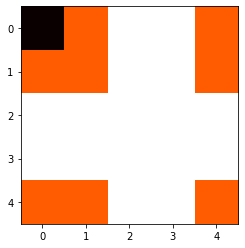

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 2*np.ones((5, 5), int) # make numpy array with data
a[0,0] = 0                 # black cell
a[0,1] = a[1,0] = a[1,1] = a[4,4] = a[4,0] = a[4,1] = a[0,4] = a[1,4] = 1 # red cells
plt.imshow(a, cmap='hot');            # create heatmap 0 is black, 1 is red, 2 is white
                                      # don't worry - you don't have to understand the plot commands, yet. 

(a) (2 points) Write a function called `valid_board()` that determines whether a $m\times n$ numpy array is a valid game-of-life board. That means that your function should return the boolean value `True` if every entry in the array is either 0 or 1 and otherwise should return `False`. 

In [6]:
# COMPLETE
def valid_board(array):
    """checks whether NumPy array is valid game board for game-of-life"""
    # YOUR CODE HERE
    # return boolean for each entry that is true if entry is 0 or 1.
    return bool(np.array([val.prod() for val in (array==0)|(array==1)]).prod())
    # raise NotImplementedError()

In [7]:
# Check that your function works as it is supposed to 
valid_board(np.array([[0,1,0],[1,1,0]]))==True
valid_board(np.array([[0,3,0],[-1,1,0]]))==False


True

(b) (5 points) Write a function called `evolution()` that takes as its input a two-dimendional Numpy array. Check, whether the array is a valid game-of-life board. If it is, return the board at the next evolution time step (that is apply the above rules to every cell and return a game board with live or dead cells one time step later). If the board is not valid, return the print statement "your board is not valid". 

Don't forget to comment your code!

In [12]:
# COMPLETE
def evolution(array):
    """evolves game board for game-of-life for one time-step"""
    # YOUR CODE HERE
    if(valid_board(array)): # check board
        arr_0 = array # duplicate array
        m,n = arr_0.shape # find shape (rows, columns) of the input array
        arr_1 = (-1)*np.ones((m,n)) # make new array for recurring timestep
        
        # left-most and right-most column placeholders
        left = arr_0[:,0] 
        right = arr_0[:,n-1]

        new_arr = np.concatenate((right[:, np.newaxis],arr_0, left[:,np.newaxis]), axis = 1) # attach right and left
        
        # top and bottom rows
        top = new_arr[0,:] 
        bottom = new_arr[m-1,:]
        
        new_arr = np.concatenate((bottom[np.newaxis,:],new_arr, top[np.newaxis,:]), axis = 0) # attach top and bottom
        
        for r in range(1,m+1): # Traverse rowcount
            for c in range(1,n+1): # Traverse colcount
                
                cell = new_arr[r,c]  # value of the cell
                neighbors = new_arr[r-1:r+2, c-1:c+2] # neighboring arrays

                if(cell == 1):  # live cells
                    if(np.sum(neighbors)-cell<2): # if there are fewer than 2 live neighbors, kill the cell
                        arr_1[r-1,c-1] = 0
                    elif(np.sum(neighbors)-cell>3): # if there are more than 3 live neighbors, kill the cell
                        arr_1[r-1,c-1] = 0
                    else:                        # if there are 2 or 3 live neighbors, cell remains
                        arr_1[r-1,c-1] = 1
                    
                if(cell == 0):  # Checking for dead cells
                    if(np.sum(neighbors)==3): # if there are exactly three live neighbors, cell is active
                        arr_1[r-1,c-1] = 1
                    else:                  # otherwise cell remains dead
                        arr_1[r-1,c-1] = 0
                        
        return arr_1 # return board
        
    else: # check board validity
        return print("invalid board") 
    # raise NotImplementedError()

**Optional:** If you are not able to implement the `evolution()` function above, provide a written description of your algorithm here instead for potential partial credit. 

YOUR ANSWER HERE

In [13]:
# Check your evolution function 

evolution(np.array([[1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0]]))==np.array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1.],
       [1., 0., 1., 1., 0.]])


array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

**Remark:** The function `print_board()` defined below takes a $m \times n$ NumPy array as its input and returns a printed image of the live (black) and dead (white) cells. Execute the code below to define the function. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def print_board(array):
    """visualizes game board for game of life"""
    plt.imshow(array, cmap = 'binary');

(c) (4 points) Use either NumPy or Scipy to generate a game-of-life board of size $10 \times 10$ in which each cell is a Bernoulli(p) random variable. That is, assume that cells are independent and that each value is 1 with probability p or otherwise 0. Start with p=0.5. Look at your initial board (you don't have to show the image). Show the visualization of the board after 100 steps of evolution. Repeat this process for a number of different random seeds (at least 10 different seeds). You do not have to show us your plots (you can only show one plot at a time per Juypter Notebook cell with the `print_board()` function). What happens if you start with a different (larger, smaller) value of p? Please describe what you observe. 

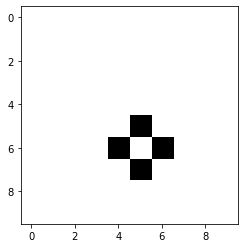

In [17]:
# COMPLETE
# YOUR CODE HERE

# set a random seed
np.random.seed(10)
p = 0.5 # predefined probability

dist = np.random.binomial(1,p,(10,10)) # 10x10 board with bernoulli(p) per each cell
for i in range(10*10):
    dist = evolution(dist) # run it through 'evolution'

#inspect board
print_board(dist)

# raise NotImplementedError()

Under the predetermined p = 0.5, when it elapses 100 time steps, the board will be sometimes empty. Other times, some shapes will remain.